# Plotting av Focused Ion Beam data med matplotlib

Målet med denne Jupyter Notebooken er at dere skal lære hvordan man kan lage en figur med FIB data via `matplotlib`.

Denne figuren skal inneholde minst 2 forskjellige bilder, hvor bare de relevante delene i bildene er med. Denne figuren skal også ha annoteringer, sånn som scalebar, a), b) og tekst som indikerer relevant objekter.

Her så følger det med 3 eksempel bildefiler fra FIBen, denne Notebooken er designet for disse. Men det skal være enkelt for dere å tilpasse den til dataene dere har tatt opp.

Tingene dere skal gjøre i denne øvingen er operasjoner som ganske lett kunne gjøres med vanlige bilderedigeringsprogrammer, men disse ferdighetene bygger et fundament for å jobbe med de mer avanserte dataene dere skal jobbe med i både TEM og SEM dataøvingene.

## Denne dataøvingen

For denne dataøvingen anbefaler jeg:

1. Gå først igjennom Notebook med eksempelfilene: `bilde0.tif`, `bilde1.tif`, `bilde2.tif`
2. Deretter tilpass Notebooken til deres egne data. Her kan dere velge 2 eller flere bilder, gjerne noen dere planlegger å bruke i labrapporten.

## Innlevering

Både bildefilen og en `HTML` versjon av Jupyter Notebooken dere har brukt til å lage den, skal leveres via Blackboard. Frist fredag 14. oktober.

# Åpne data

La oss først kikke på en av TIFF filene fra FIBen. Disse kan vi f.eks. åpne ved hjelp av Python biblioteket `tifffile`. Importer dette biblioteket

In [1]:
import tifffile as tif

Det er mange andre måter å åpne mikroskopi-data også, f.eks. ved å bruke biblioteket `HyperSpy`, som vi skal bruke neste dataøving som omhandler TEM.

Bruk funksjonen `imread` til å åpne `bilde0.tif` filen. Hvis du lurer på hvordan funksjonen virker, så kan du se på `docstring` til funksjonen ved å bruke `Shift` + `Tab`. Lagre denne til en variabel `bildedata0`

In [2]:
bildedata0 = tif.imread('bilde0.tif')

In [3]:
bildedata_skull = tif.imread('skull.tif')

In [4]:
bildedata_hull = tif.imread('Holes_milled_in_circles.tif')

Nå kan vi se hva som er i bilde-dataen vi akkurat åpnet. Gjør dette ved å skrive `bildedata0` i cellen under, og kjør den

In [5]:
bildedata0

array([[35584, 31744, 28928, ..., 19712, 20992, 22016],
       [35072, 34048, 34048, ..., 22016, 19200, 12544],
       [34304, 33024, 29184, ..., 19200, 17152, 17408],
       ...,
       [64512,     0,     0, ...,     0,     0, 64512],
       [64512,     0,     0, ...,     0,     0, 64512],
       [64512, 64512, 64512, ..., 64512, 64512, 64512]], dtype=uint16)

Her får vi opp noen verdiene som er i bildet. Dette er en `NumPy` array, som er et veldig viktig bibliotek i vitenskapelig Python. 

Men dette er ikke så altfor spennende! Sånne data er best å plotte i en figur.

`matplotlib` er et plotte-bibliotek i Python, som ofte brukes til å visualisere vitenskapelig data.

Importer sub-modulen `pyplot` i `matplotlib` og kall den `plt`

In [6]:
import matplotlib.pyplot as plt

Så lag en figur av `bildedata0` ved å bruke `imshow` funksjonen i `plt`.

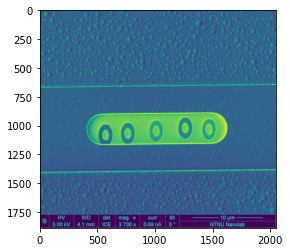

In [7]:
plt.imshow(bildedata0)

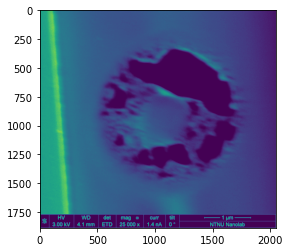

In [8]:
plt.imshow(bildedata_skull)


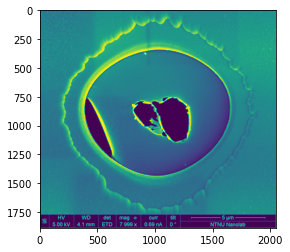

In [9]:
plt.imshow(bildedata_hull)

## Forbedre figuren: beskjæring

Først: beskjære bildet, slik at vi bare får med selve vinduet.

Vi gjør dette via NumPy slicing. Syntaksen her er `[y0:y1, x0:x1]` som virker på arrayen som skal beskjæres. `NUMPYARRAY[10:20, 10:20]`. Bruk bildet du allerede har lagd, til å finne `y0, y1, x0, x1`. Så lagre dette til en ny variabel: `bildedata0_c`.

In [10]:
bildedata0_c = bildedata0[850:1200, 400:1650]

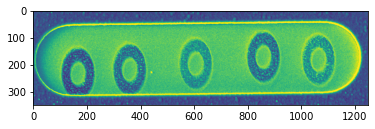

In [11]:
plt.imshow(bildedata0_c)

Hvis beskjæringen ikke var bra nok, så bare gå tilbake til "slicing" cellen, og forandre tallene. Deretter kjør cellen med `imshow` på nytt.

In [12]:
bildedata_skull_c = bildedata_skull[250:1550, 400:1800]

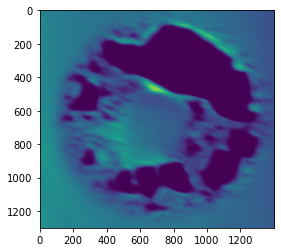

In [13]:
plt.imshow(bildedata_skull_c)

In [14]:
bildedata_hull_c = bildedata_hull[250:1500, 300:1700]

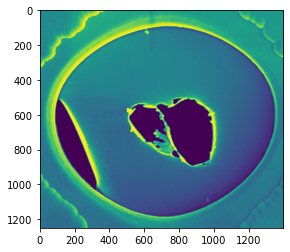

In [15]:
plt.imshow(bildedata_hull_c)

## Bilde nummer 2

Nå kan vi legge til flere bilder i samme figur. Dette er veldig nyttig for effektiv bruk av plass i rapporter.

First åpne de en av de andre bildene (`bilde1.tif`), via `imread`. Kall den `bildedata1`. Deretter plot den via `plt.imshow`

In [16]:
bildedata1 = tif.imread('bilde1.tif')

In [18]:
bildedata1_c = bildedata1[150:1650, 800:1200]

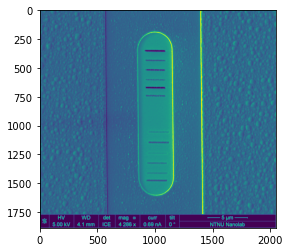

In [17]:
plt.imshow(bildedata1)

### Rotere og beskjære

Her må vi både beskjære og rotere.

Beskjær på samme måte som det forrige bildet, via numpy slicing.

In [ ]:
bildedata1_c = bildedata1[150:1650, 800:1200]

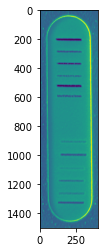

In [20]:
plt.imshow(bildedata1_c)

Så må denne roteres, slik at den blir horisontal.

Først må vi importere en rotasjonsfunksjon fra `scipy`, denne er sub-modulen `ndimage`, og funksjonen heter `rotate`. Her kan `from ... import ...` brukes

In [22]:
from scipy import ndimage

Bruk `rotate`, til å gjøre vinduet horisontalt. Lag en ny variabel som heter `bildedata1_c`. Bruk docstring til å se hvordan den virker.

In [25]:
bildedata_skull_cr = ndimage.rotate(bildedata_skull_c, 270, axes=(1,0))

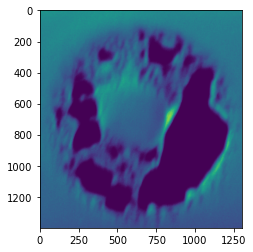

In [26]:
plt.imshow(bildedata_skull_cr)

In [23]:
bildedata1_c_c = ndimage.rotate(bildedata1_c, 90, axes=(1,0))

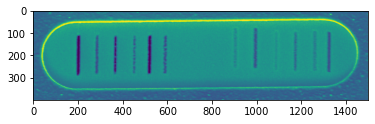

In [24]:
plt.imshow(bildedata1_c_c)

### Bilde nummer 3

Tilslutt så åpner vi det siste bildet, og her må vi rotere først, og så beskjære. Filen heter `bilde2.tif`.

In [28]:
bildedata2 = tif.imread('bilde2.tif')

Først se hvordan den ser ut via `plt.imshow`

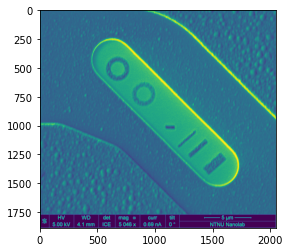

In [29]:
plt.imshow(bildedata2)

Så roter, slik at den blir horisontal. Lag en ny variabel `temp_bildedata2`

In [32]:
temp_bildedata2_c = temp_bildedata2[1050:1550, 500:2300]

In [30]:
temp_bildedata2 = ndimage.rotate(bildedata2, 45, axes=(1,0))

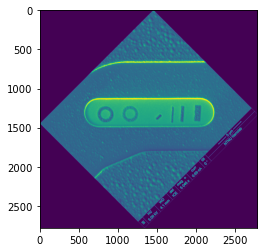

In [31]:
plt.imshow(temp_bildedata2)

Så beskjær bildet, slik at bare vinduet blir med.

In [23]:
temp_bildedata2_c = temp_bildedata2[1050:1550, 500:2350]

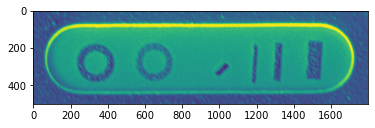

In [33]:
plt.imshow(temp_bildedata2_c)

## Skalering av data

En viktig del av vitenskapelig data er metadata. Dette er informasjon om dataene: aksjelerasjonsspenning, detektortype, og romlig kalibrering. Det sistnevnte er spesielt viktig for plotting av figurene her, siden vi vil ha en kalibrert "scalebar" i bildet.

Metadataene får vi tilgang til via `tifffile.TiffFile`. Lag et `TiffFile` object `tif0`

In [34]:
tif0 = tif.TiffFile('bilde0.tif')

Metadataene er i `fei_metadata` i `tif0`. Husk at du kan "minimere" resultater fra celler ved å trykke på den blå vertikale linjen til venstre for cellen.

In [35]:
tif0.fei_metadata

{'User': {'Date': '08/26/2021',
  'Time': '11:48:09 AM',
  'User': 'supervisor',
  'UserText': 'NTNU Nanolab',
  'UserTextUnicode': '4E0054004E00550020004E0061006E006F006C0061006200'},
 'System': {'Type': 'DualBeam',
  'Dnumber': 'D0518',
  'Software': '4.5.10.2430',
  'BuildNr': 2430,
  'Source': 'FEG',
  'Column': 'Elstar',
  'FinalLens': 'Elstar',
  'Chamber': 'xT-SDB',
  'Stage': '6inch',
  'Pump': 'TMP',
  'ESEM': 'no',
  'Aperture': 'AVA',
  'Scan': 'PIA 2.0',
  'Acq': 'PIA 2.0',
  'EucWD': 0.004,
  'SystemType': 'Helios NanoLab 600',
  'DisplayWidth': 0.32,
  'DisplayHeight': 0.24},
 'Beam': {'HV': 5000,
  'Spot': '',
  'StigmatorX': -0.0246418,
  'StigmatorY': 0.032545,
  'BeamShiftX': 5.88008e-11,
  'BeamShiftY': -4.36646e-07,
  'ScanRotation': 0,
  'ImageMode': 'Normal',
  'Beam': 'EBeam',
  'Scan': 'EScan'},
 'EBeam': {'Source': 'FEG',
  'ColumnType': 'Elstar',
  'FinalLens': 'Elstar',
  'Acq': 'PIA 2.0',
  'Aperture': 'AVA',
  'ApertureDiameter': 6.4e-05,
  'HV': 5000,
  'H

Dette inneholder veldig mye informasjon, som er nyttig når man skal skrive om dataene i ettertid. Spesielt siden det er lett å glemme å skrive ned metadata.

Romlig kalibrering er i `['EScan']['PixelWidth']`, i dette tilfellet er `PixelWidth` og `PixelHeight` det samme. Så vi trenger bare en av dem. Lagre denne i en ny variabel: `skala0`

In [37]:
skala0 = tif0.fei_metadata['EScan']['PixelWidth']

Gjenta dette for `bilde1.tif` og `bilde2.tif`, slik at du får en `skala1` og `skala2`.

In [38]:
tif1 = tif.TiffFile('bilde1.tif')

In [45]:
tif_hull = tif.TiffFile('Holes_milled_in_circles.tif')

In [46]:
skala_hull = tif_hull.fei_metadata['EScan']['PixelWidth']

In [39]:
skala1 = tif1.fei_metadata['EScan']['PixelWidth']

In [40]:
tif2 = tif.TiffFile('bilde2.tif')

In [41]:
skala2 = tif2.fei_metadata['EScan']['PixelWidth']

In [42]:
tif_skull = tif.TiffFile('skull.tif')

In [43]:
skala_skull = tif_skull.fei_metadata['EScan']['PixelWidth']

# Lage plot med alle bildene

Nå som vi har gjort de 3 bildene klare, så kan vi kombinere dem i en figur.

Første steget er å lage et figur objekt `fig` og en liste med 3 sub-plot objekter `axarr`. Dette lages via `plt.subplots`.

Tips: se på docstring med `Shift` + `Tab`, og bla ned til `Examples`. Her er vi ute etter å lage en figur, med tre vertikale subplot.

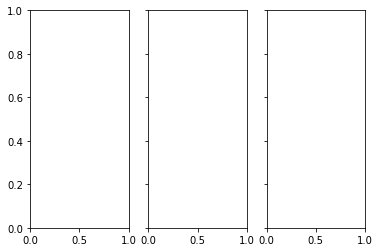

In [52]:
fig, axarr = plt.subplots(1, 3, sharey=True)

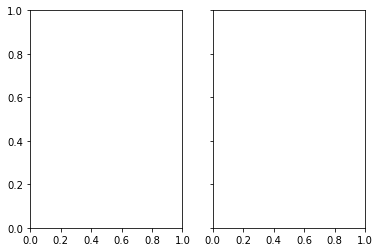

In [53]:
fig_min, ax = plt.subplots(1, 2, sharey=True)

Deretter "hent" ut de forskjellige subplottene fra `axarr`: `ax0`, `ax1`, `ax2`. Husk at denne er en liste.

In [54]:
ax0 = axarr[0]
ax1 = axarr[1]
ax2 = axarr[2]

In [55]:
ax_0 = ax[0]
ax_1 = ax[1]

Så kan vi bruke `imshow` på hvert av disse subplottene, til å plotte bildene. Men først må vi ordne skaleringen, siden vi vil plotte dataene i mikrometer.

Dette gjøres via `extent` i `imshow`. Formattet er: `[left, right, bottom, top]`.

Lag `extent0`, `extent1` og `extent2`, i form av en liste.

Merk at dette er i meter, så det må endres til mikrometer.

In [56]:
extent0 = [0, skala0 * bildedata0_c.shape[1] * 10**6, 0, skala0 * bildedata0_c.shape[0] * 10**6]

In [57]:
extent1 = [0, skala1 * bildedata1_c_c.shape[1] * 10**6, 0, skala1 * bildedata1_c_c.shape[0] * 10**6]

In [58]:
extent2 = [0, skala2 * temp_bildedata2_c.shape[1] * 10**6, 0, skala2 * temp_bildedata2_c.shape[0] * 10**6]

In [59]:
extent_skull = [0, skala_skull*bildedata_skull_cr.shape[1]*10**6, 0, skala_skull*bildedata_skull_cr.shape[1]*10**6]

In [60]:
extent_hull = [0, skala_hull*bildedata_hull_c.shape[1]*10**6, 0, skala_hull*bildedata_hull_c.shape[1]*10**6]

Så kan vi bruke dette i `imshow`. Bruk `imshow` i `ax0`, `ax1` og `ax2`, kombinert med `extent0`, `extent1`, og `extent2`.

Tips: husk at det er veldig mye informasjon i docstrings! (`Shift` + `Tab`)

In [61]:
ax0.imshow(bildedata0_c, extent=extent0)

In [62]:
ax1.imshow(bildedata1_c_c, extent=extent1)

In [63]:
ax2.imshow(temp_bildedata2_c, extent=extent2)

In [64]:
ax_0.imshow(bildedata_skull_cr, extent=extent_skull)

In [65]:
ax_1.imshow(bildedata_hull_c, extent=extent_hull)

For å se på resultatet, så vi må lagre dette som en bildefil. Dette gjøres via `savefig` i `fig` objektet.

Figuren lagres via `savefig` i `fig` objektet: `bilde.jpg`

In [66]:
fig.savefig('bilde.jpg')

In [67]:
fig_min.savefig('holes.jpg', dpi=300)

Åpne dette bildet, f.eks. ved å trykke på "Refresh File List" i JupyterLab, eller åpne filen direkte på datamaskinen.

Nå kan vi se hvordan figuren ser ut, og at det er en del ting som mangler.

- Oppløsningen er dårlig
- Masse ekstra "tomrom" som vi ikke bryr oss om
- Vi vil heller ha en "scale bar" enn å ha tallene på x- og y-aksen
- Det mangler annoteringer
- Bildene har litt forskjellige størrelser: dette kan løses ved å at beskjæringen tilpasses slik at alle har samme forhold mellom bredde og høyde.

## Høyere oppløsning

Øke oppløsning er enklelt: bruk `dpi` parameteren i `savefig`. F.eks. sett den til `300`.

In [68]:
fig.savefig('bilde.jpg', dpi=300)

## Legge til en skalebar

Dette er litt komplisert kode, og bruker avanserte `matplotlib` funksjoner.

In [69]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=8)

In [70]:
scalebar_kwargs = {'size': 5, 'label': '5 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar0 = AnchoredSizeBar(transform=ax0.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar0.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax0.add_artist(scalebar0)

In [71]:
scalebar1 = AnchoredSizeBar(transform=ax1.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar1.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax1.add_artist(scalebar1)

In [72]:
scalebar2 = AnchoredSizeBar(transform=ax2.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar2.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax2.add_artist(scalebar2)

In [73]:
fig.savefig("bilde.jpg", dpi=300)

In [74]:
scalebar_kwargs = {'size': 2, 'label': '2 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar_hull = AnchoredSizeBar(transform=ax_1.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar_hull.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax_1.add_artist(scalebar_hull)

In [75]:
fontprops = fm.FontProperties(size=5)
scalebar_kwargs = {'size': 1, 'label': '1 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar_skull = AnchoredSizeBar(transform=ax_0.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar_skull.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax_0.add_artist(scalebar_skull)

In [76]:
ax_0.set_xticks([])
ax_0.set_yticks([])
ax_1.set_xticks([])
ax_1.set_yticks([])

[]

In [77]:
fig_min.savefig("holes.jpg", dpi=300)

## Legg til annoteringer

### a, b og c

Legge til markering av subplottene, sånn som `a`, `b` og `c`. Dette kan gjøres via `ax` sin `annotate` funksjon. Sjekk docstring for informasjon. Bruk `xycoords='axes fraction'`, `fontsize` og `color`.

In [78]:
ax0.annotate('a', (0.01, 1), xycoords='axes fraction', color='black')

Text(0.01, 1, 'a')

Gjør dette for både `ax0`, `ax1` og `ax2`.

In [79]:
ax1.annotate('b', (0.01, 1), xycoords='axes fraction', color='black')

Text(0.01, 1, 'b')

In [80]:
ax2.annotate('c', (0.01, 1), xycoords='axes fraction', color='black')

Text(0.01, 1, 'c')

Så lagre `bilde.jpg` på nytt.

In [81]:
fig.savefig("bilde.jpg", dpi=300)

In [82]:
ax_0.annotate('a', (0.01, 1), xycoords='axes fraction', color='black')

Text(0.01, 1, 'a')

In [83]:
ax_1.annotate('b', (0.01, 1), xycoords='axes fraction', color='black')

Text(0.01, 1, 'b')

### Tall på objektene

Så legg til annoteringer på selve objektene, igjen ved å bruke `annotate`.

In [84]:
ax0.annotate('1', (0.1, 0.6), xycoords='axes fraction', color='black', fontsize=5)

Text(0.1, 0.6, '1')

In [85]:
ax1.annotate('1', (0.1, 0.6), xycoords='axes fraction', color='black', fontsize=5)

Text(0.1, 0.6, '1')

In [86]:
ax2.annotate('1', (0.1, 0.6), xycoords='axes fraction', color='black', fontsize=5)

Text(0.1, 0.6, '1')

In [87]:
ax_1.annotate('1', (0.15, 0.45), xycoords='axes fraction', color='black')
ax_1.annotate('2', (0.5, 0.65), xycoords='axes fraction', color='black')

Text(0.5, 0.65, '2')

## Fjerne "akse-tall"

Fjerne tallene rundt plottet, ved å bruke `set_xticks([])` og `set_yticks([])` i `ax`-objektene.

In [88]:
ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])


[]

In [89]:
fig.savefig("bilde.jpg", dpi=300)

## Fjerne tomrom i `fig`

Tilslutt, så fjerner vi tomrom rundt `fig` ved å bruke `subplots_adjust`

In [90]:
fig.subplots_adjust(top=0.9)
#fig.subplots_adjust(wspace=0)

In [91]:
fig.savefig("bilde.jpg", dpi=300)

Det siste tomrommet kom fjernes ved å fin-innstille `figwidth` og `figheight` via `fig.set_figwidth` og `fig.set_figheight`. For å se hva den er nå, bruk `fig.get_figwidth()` og `fig.get_figheight()`

In [92]:
fig.set_figheight(2)
fig.set_figwidth(5)
fig.savefig("bilde.jpg", dpi=300)

In [104]:
fig_min.subplots_adjust(top=0.45, wspace=0)

In [94]:
fig_min.get_figwidth()


6.0

In [95]:
fig_min.get_figheight()

4.0

In [108]:
#fig_min.set_figheight()
fig_min.set_figwidth(2.7)


In [109]:
fig_min.savefig("holes2.jpg", dpi=300)

# Deres egne data

Nå skal dere bruke denne Jupyter Notebooken til å lage tilsvarende figur, men med dataene dere tok opp i FIB-laben.

## Måter figurene kan tilpasses:
- `cmap` parameteren i `imshow`. For eksempel: `ax.imshow(..., cmap='inferno')`. Se [matplotlib sin dokumentasjon](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for en liste over fargekart. Merk at "perceptually uniform colormaps" er foretrukket i datavisualisering!
- Subplot posisjonering og størrelser kan kontrolleres med `add_subplot` og `GridSpec`
    * `add_subplot`: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#basic-quickstart-guide
    * `GridSpec`, mer komplisert, men mer kontroll: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#fine-adjustments-to-a-gridspec-layout 

# Fler eksempler på hva man kan gjøre med NumPy + matplotlib

* https://en.wikipedia.org/wiki/Quantum_dot#/media/File:Gaas_inas_quantum_dot.jpg
* https://en.wikipedia.org/wiki/Perovskite_(structure)#/media/File:Perovskite_oxide_thin_film.jpg med atomstruktur [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#matplotlib) (ASE)
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Scanning_transmission_electron_microscopy_srtio3_compare_adf_abf.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Stem_dpc_schematic_magnetic_explanation.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Ferromagnetic_domains_in_spiral_pattern_for_Fe60Al40.jpg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectrum_feature_overview.svg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectroscopy_coreloss_lsmo.svg